In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel('pizza_sales_dataset.xlsx',sheet_name='pizza_sales')
df

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,2015-12-31,21:23:10,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza
48616,48617,21348,four_cheese_l,1,2015-12-31,21:23:10,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza
48617,48618,21348,napolitana_s,1,2015-12-31,21:23:10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza
48618,48619,21349,mexicana_l,1,2015-12-31,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


1.Cleaning Data

In [3]:
df.isnull().sum()

,0
order_details_id,0
order_id,0
pizza_id,0
quantity,0
order_date,0
order_time,0
unit_price,0
total_price,0
pizza_size,0
pizza_category,0


In [4]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
48615,False
48616,False
48617,False
48618,False


2.EDA

In [5]:
df.describe()

,order_details_id,order_id,quantity,order_date,unit_price,total_price
count,48620.000000,48620.000000,48620.000000,48620,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,2015-06-29 11:03:43.611682560,16.494132,16.821474
min,1.000000,1.000000,1.000000,2015-01-01 00:00:00,9.750000,9.750000
25%,12155.750000,5337.000000,1.000000,2015-03-31 00:00:00,12.750000,12.750000
50%,24310.500000,10682.500000,1.000000,2015-06-28 00:00:00,16.500000,16.500000
75%,36465.250000,16100.000000,1.000000,2015-09-28 00:00:00,20.250000,20.500000
max,48620.000000,21350.000000,4.000000,2015-12-31 00:00:00,35.950000,83.000000
std,14035.529381,6180.119770,0.143077,NaN,3.621789,4.437398


In [8]:
df.columns

Index(['order_details_id', 'order_id', 'pizza_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_details_id   48620 non-null  int64         
 1   order_id           48620 non-null  int64         
 2   pizza_id           48620 non-null  object        
 3   quantity           48620 non-null  int64         
 4   order_date         48620 non-null  datetime64[ns]
 5   order_time         48620 non-null  object        
 6   unit_price         48620 non-null  float64       
 7   total_price        48620 non-null  float64       
 8   pizza_size         48620 non-null  object        
 9   pizza_category     48620 non-null  object        
 10  pizza_ingredients  48620 non-null  object        
 11  pizza_name         48620 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 4.5+ MB


A. Order Per Hari

In [55]:
# %A:nama hari %B:nama bulan %d:tanggal %m:bulan

order_per_hari=df.groupby(pd.to_datetime(df['order_date']).dt.strftime("%A"))['order_id'].count()

urutan_hari = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# order_per_hari.index itu sebagai input ke pd.categorical untuk dikategorikan berdasarkan urutan yg terdapat di categories
order_per_hari.index=pd.Categorical(values=order_per_hari.index,categories=urutan_hari,ordered=True)
order_per_hari=order_per_hari.sort_index()
print(order_per_hari)

Monday       6369
Tuesday      6753
Wednesday    6797
Thursday     7323
Friday       8106
Saturday     7355
Sunday       5917
Name: order_id, dtype: int64


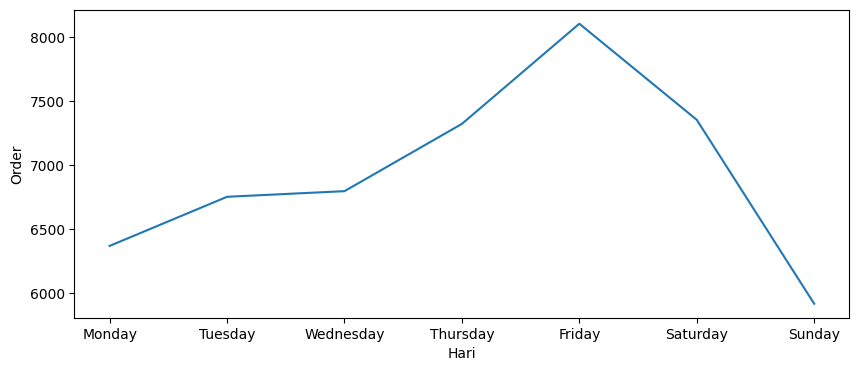

In [56]:
plt.figure(figsize=(10,4))
plt.plot(order_per_hari.index,order_per_hari.values)
# sns.lineplot(x=order_per_hari.index,y=order_per_hari.values)
plt.xlabel('Hari')
plt.ylabel('Order')
plt.show()

B. Order Per Bulan

In [57]:
order_per_bulan=df.groupby(pd.to_datetime(df['order_date']).dt.strftime("%B"))['order_date'].count()

urutan_bulan = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
# values=order_per_bulan.index ini sebagai inputan ke pd.Categorical untuk dikategorikan berdasarkan urutan categories
order_per_bulan.index=pd.Categorical(values=order_per_bulan.index,categories=urutan_bulan,ordered=True)
order_per_bulan=order_per_bulan.sort_index()
order_per_bulan

,order_date
January,4156
February,3892
March,4186
April,4067
May,4239
June,4025
July,4301
August,4094
September,3819
October,3797


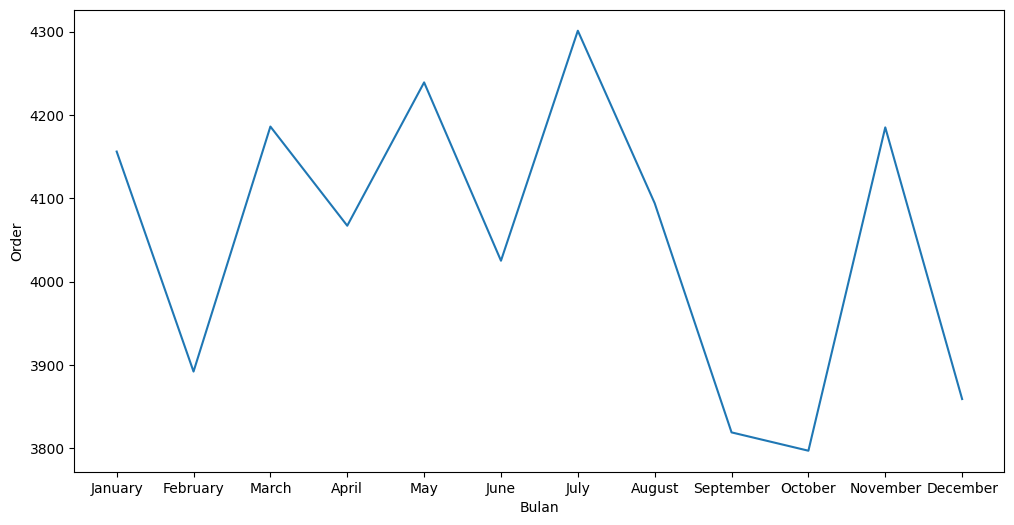

In [60]:
plt.figure(figsize=(12,6))
plt.plot(order_per_bulan.index,order_per_bulan.values)
plt.xlabel('Bulan')
plt.ylabel('Order')
plt.show()

Text(0, 0.5, 'Count')

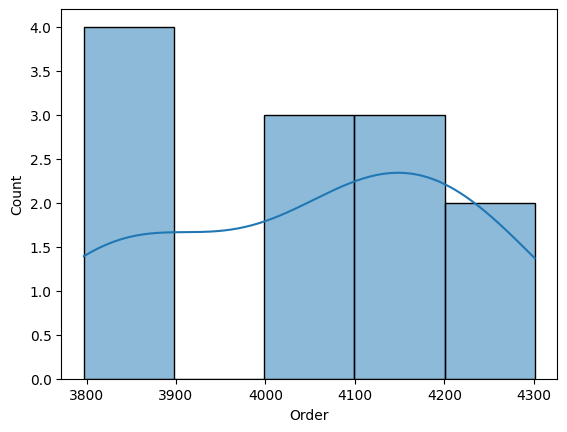

In [78]:
sns.histplot(x=order_per_bulan.values,kde=True,bins=5)
plt.xlabel('Order')
plt.ylabel('Count')

C.Pendapatan Per Bulan

In [63]:
pendapatan_per_bulan=df.groupby(df['order_date'].dt.strftime("%B"))['total_price'].sum()

urutan_bulan=['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
pendapatan_per_bulan.index=pd.Categorical(values=pendapatan_per_bulan.index,categories=urutan_bulan,ordered=True)
pendapatan_per_bulan=pendapatan_per_bulan.sort_index()
pendapatan_per_bulan

,total_price
January,69793.30
February,65159.60
March,70397.10
April,68736.80
May,71402.75
June,68230.20
July,72557.90
August,68278.25
September,64180.05
October,64027.60


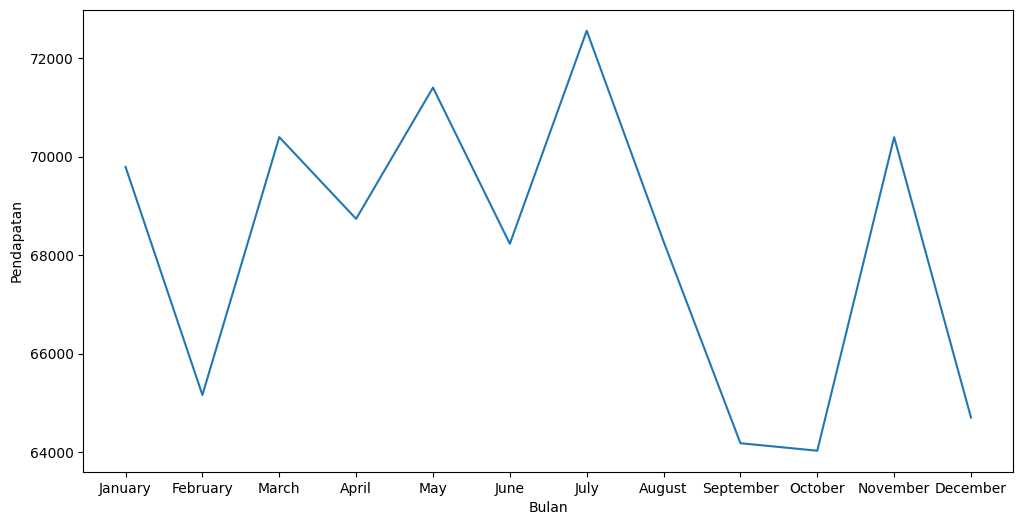

In [65]:
plt.figure(figsize=(12,6))
plt.plot(pendapatan_per_bulan.index,pendapatan_per_bulan.values)
plt.xlabel('Bulan')
plt.ylabel('Pendapatan')
plt.show()

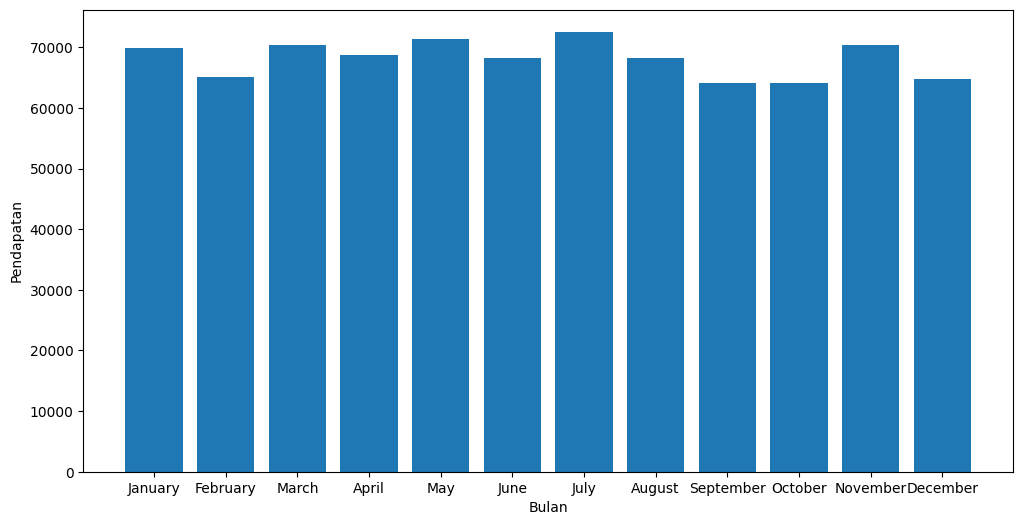

In [66]:
plt.figure(figsize=(12,6))
plt.bar(pendapatan_per_bulan.index,pendapatan_per_bulan.values)
plt.xlabel('Bulan')
plt.ylabel('Pendapatan')
plt.show()

D.Penjualan berdasarkan Ukuran Pizza

<Axes: xlabel='pizza_size', ylabel='total_price'>

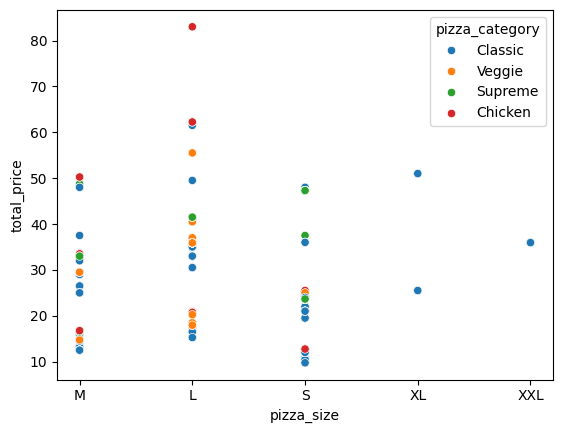

In [71]:
sns.scatterplot(x='pizza_size',y='total_price',data=df,hue='pizza_category')

<Axes: xlabel='pizza_size', ylabel='total_price'>

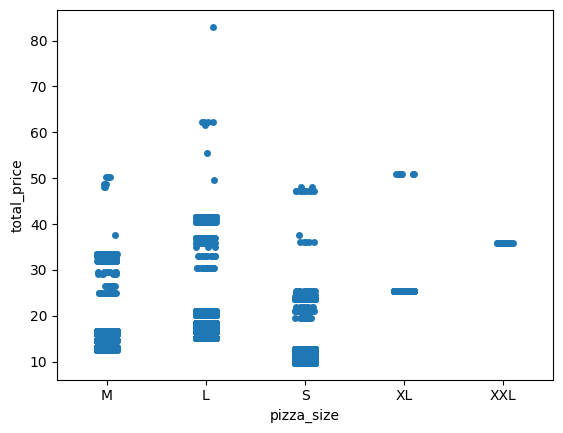

In [83]:
sns.stripplot(x='pizza_size',y='total_price',data=df)

<Axes: xlabel='pizza_size'>

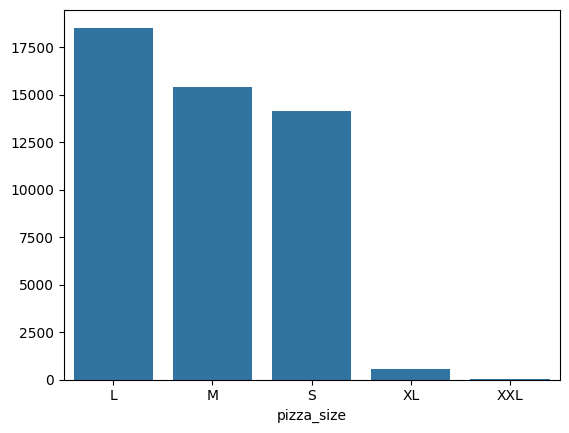

In [88]:
ps=df['pizza_size'].value_counts()
sns.barplot(x=ps.index,y=ps.values)

<Axes: xlabel='pizza_size', ylabel='count'>

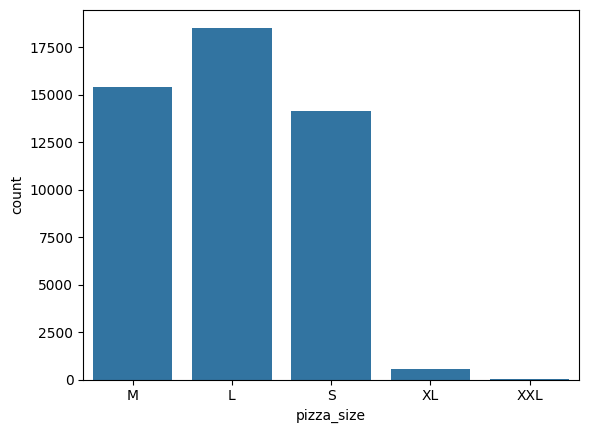

In [92]:
sns.countplot(x='pizza_size',data=df)

E.Penjualan berdasarkan Kategori Pizza

In [89]:
cate=df.groupby(df['pizza_category'])['quantity'].sum()
cate

,quantity
pizza_category,
Chicken,11050
Classic,14888
Supreme,11987
Veggie,11649


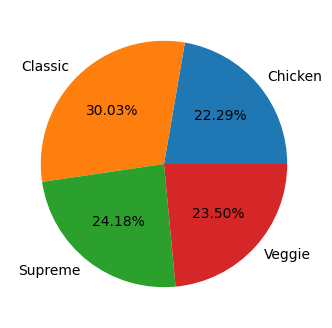

In [91]:
plt.figure(figsize=(10,4))
plt.pie(x=cate.values,labels=cate.index,autopct="%1.2f%%")
plt.show()

F.TOP 5 Pizza Terlaris

In [93]:
top=df['pizza_name'].value_counts().head(5)
top

,count
pizza_name,
The Classic Deluxe Pizza,2416
The Barbecue Chicken Pizza,2372
The Hawaiian Pizza,2370
The Pepperoni Pizza,2369
The Thai Chicken Pizza,2315


<ipython-input-105-29c9f5a83622>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=top.index,rotation=40)


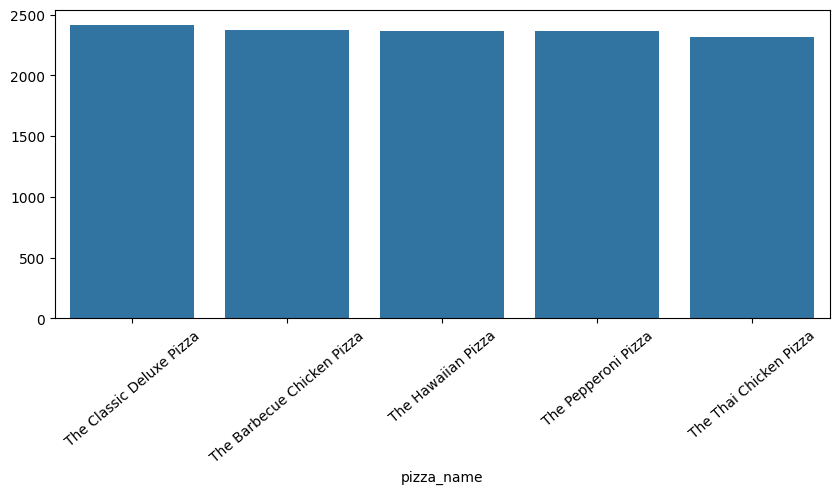

In [105]:
plt.figure(figsize=(10,4))
ax=sns.barplot(x=top.index,y=top.values)
ax.set_xticklabels(labels=top.index,rotation=40)
# plt.xticks(rotation=45)
plt.show()

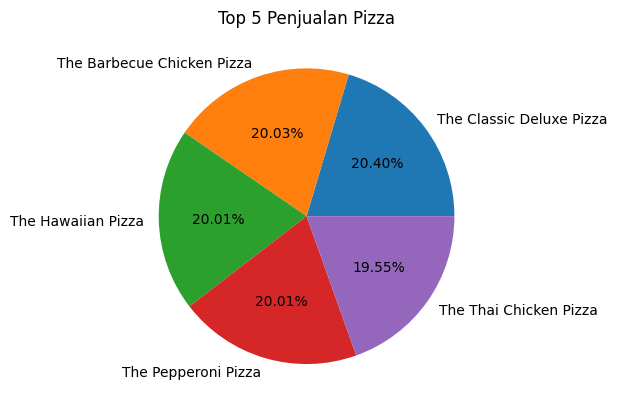

In [107]:
plt.pie(x=top.values,labels=top.index,autopct="%1.2f%%")
plt.title('Top 5 Penjualan Pizza')
plt.show()